In [1]:
%matplotlib inline

# On importe ce que l'on a besoin
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150 #Simplement pour avoir une meilleure résolution

# Lissage non linéaire

In [2]:
# Définition de la somme des trois courbes
def F(x, A_1, m_1, g_1, A_2, m_2, g_2, A_3, m_3, g_3):
	return (A_1*g_1**2)/((x-m_1)**2+g_1**2)+(A_2*g_2**2)/((x-m_2)**2+g_2**2)+(A_3*g_3**2)/((x-m_3)**2+g_3**2)

In [3]:
# Le fichier dans lequel se trouve les données
fichier_donnees = "data.csv"

# Lire les données
with open(fichier_donnees) as f:
    data = pd.read_csv(f,sep="\t",header=None)
    f.close()

# On convertit en tableau
X = data[0].to_numpy()
Y = data[1].to_numpy()
DY = data[2].to_numpy()

### Lissage

In [4]:
# Estimation initiale des paramètres
p0 = [0.8,1.30,0.2,0.6,0.3,0.01,0.6,1,0.1] 

# On appelle la fonction de lissage
popt, pcov = curve_fit(F, X, Y, p0, )

#On affiche les paramètres avec les erreurs
print("Paramètres optimisés:")

#Afin de réduire le nombre de ligne requise pour tout afficher
variables = ["A_1","m_1","g_1","A_2","m_2","g_2","A_3","m_3","g_3",]
          
for i in range(9):
    valeur = popt[i]
    delta = np.sqrt(pcov[i,i])
    print(f"{variables[i]}: {valeur} +/- {delta}")

Paramètres optimisés:
A_1: 0.805241846465728 +/- 0.009154553167339425
m_1: 1.320008114518187 +/- 0.0028131424106784537
g_1: 0.21528746711270216 +/- 0.003532603739001342
A_2: 0.5634395821582933 +/- 0.007079854907820027
m_2: 0.45924797454418803 +/- 0.001520679008895756
g_2: 0.11669885647473598 +/- 0.002514163619530047
A_3: 0.3044860753993142 +/- 0.00979982157489707
m_3: 0.976727607291625 +/- 0.005442176609252521
g_3: 0.1703929074720318 +/- 0.010122169976199117


### Graphique

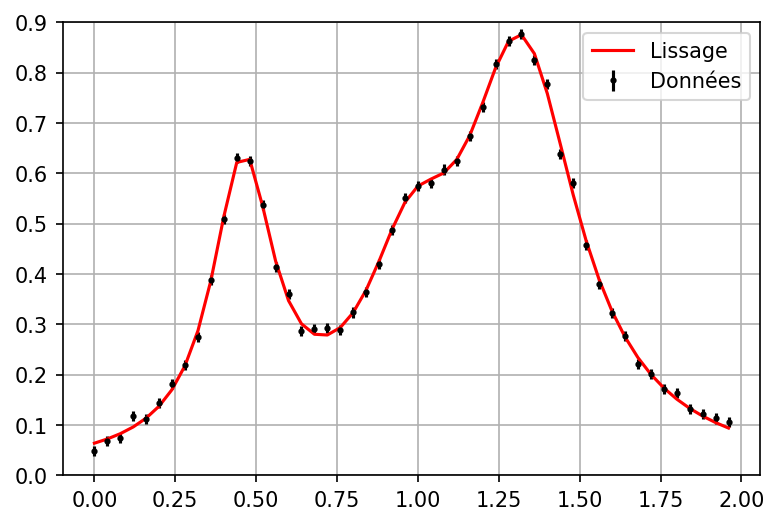

In [5]:
# Tracer le graphique
plt.plot(X, F(X,*popt), label="Lissage", color="red")
plt.errorbar(X,Y,fmt="ko",ms=2,yerr=DY, label="Données")

# Option d'affichage
plt.ylim(0,0.9)
plt.grid()
plt.legend()

# Afficher le graphique
plt.show()

# Approximation de Tchébychev

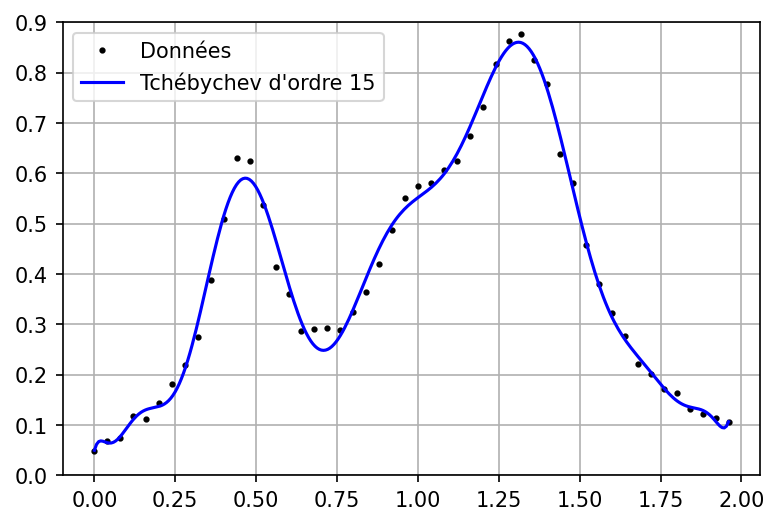

In [6]:
#Créer la figure
plt.figure()

#Degré du polynôme
deg = 15

# Coefficients des polynômes de Tchébychev
coeff = np.polynomial.chebyshev.chebfit(X, Y, deg)

# Évaluation de l'approximation
x_fit = np.linspace(0, max(X), 300)
y_fit = np.polynomial.chebyshev.chebval(x_fit, coeff)

#On trace nos données et nos fonctions
plt.plot(X,Y,"ko",ms=2, label="Données")
plt.plot(x_fit, y_fit,color="blue",label=f"Tchébychev d'ordre {deg}")

#Options d'affichage
plt.ylim(0,0.9)
plt.grid()
plt.legend()

plt.show()